## Unrate 

In [1]:
library(forecast)
library(tseries)
library(zoo)
library(data.table)
library(jsonlite)
library(httr)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Anexando pacote: 'zoo'


Os seguintes objetos são mascarados por 'package:base':

    as.Date, as.Date.numeric



Anexando pacote: 'data.table'


Os seguintes objetos são mascarados por 'package:zoo':

    yearmon, yearqtr


Warning message:
"pacote 'httr' foi compilado no R versão 4.4.3"


In [2]:
api <- fromJSON("api-key.json")

In [3]:
url <- "https://api.stlouisfed.org/fred/series/observations"

# Fazer a requisição GET
res <- GET(url, query = list(
  series_id = "unrate",       # ID da série
  api_key = api$key, # sua chave do FRED
  file_type = "json"       # resposta em JSON
))

In [4]:
data <- fromJSON(content(res, "text"), flatten = TRUE)$observations

In [5]:
data = data.table(data)

In [6]:
data[, realtime_start:=NULL]
data[, realtime_end:=NULL]

In [7]:
data[, date:=as.Date(date)]
data[, value:=as.numeric(value)]

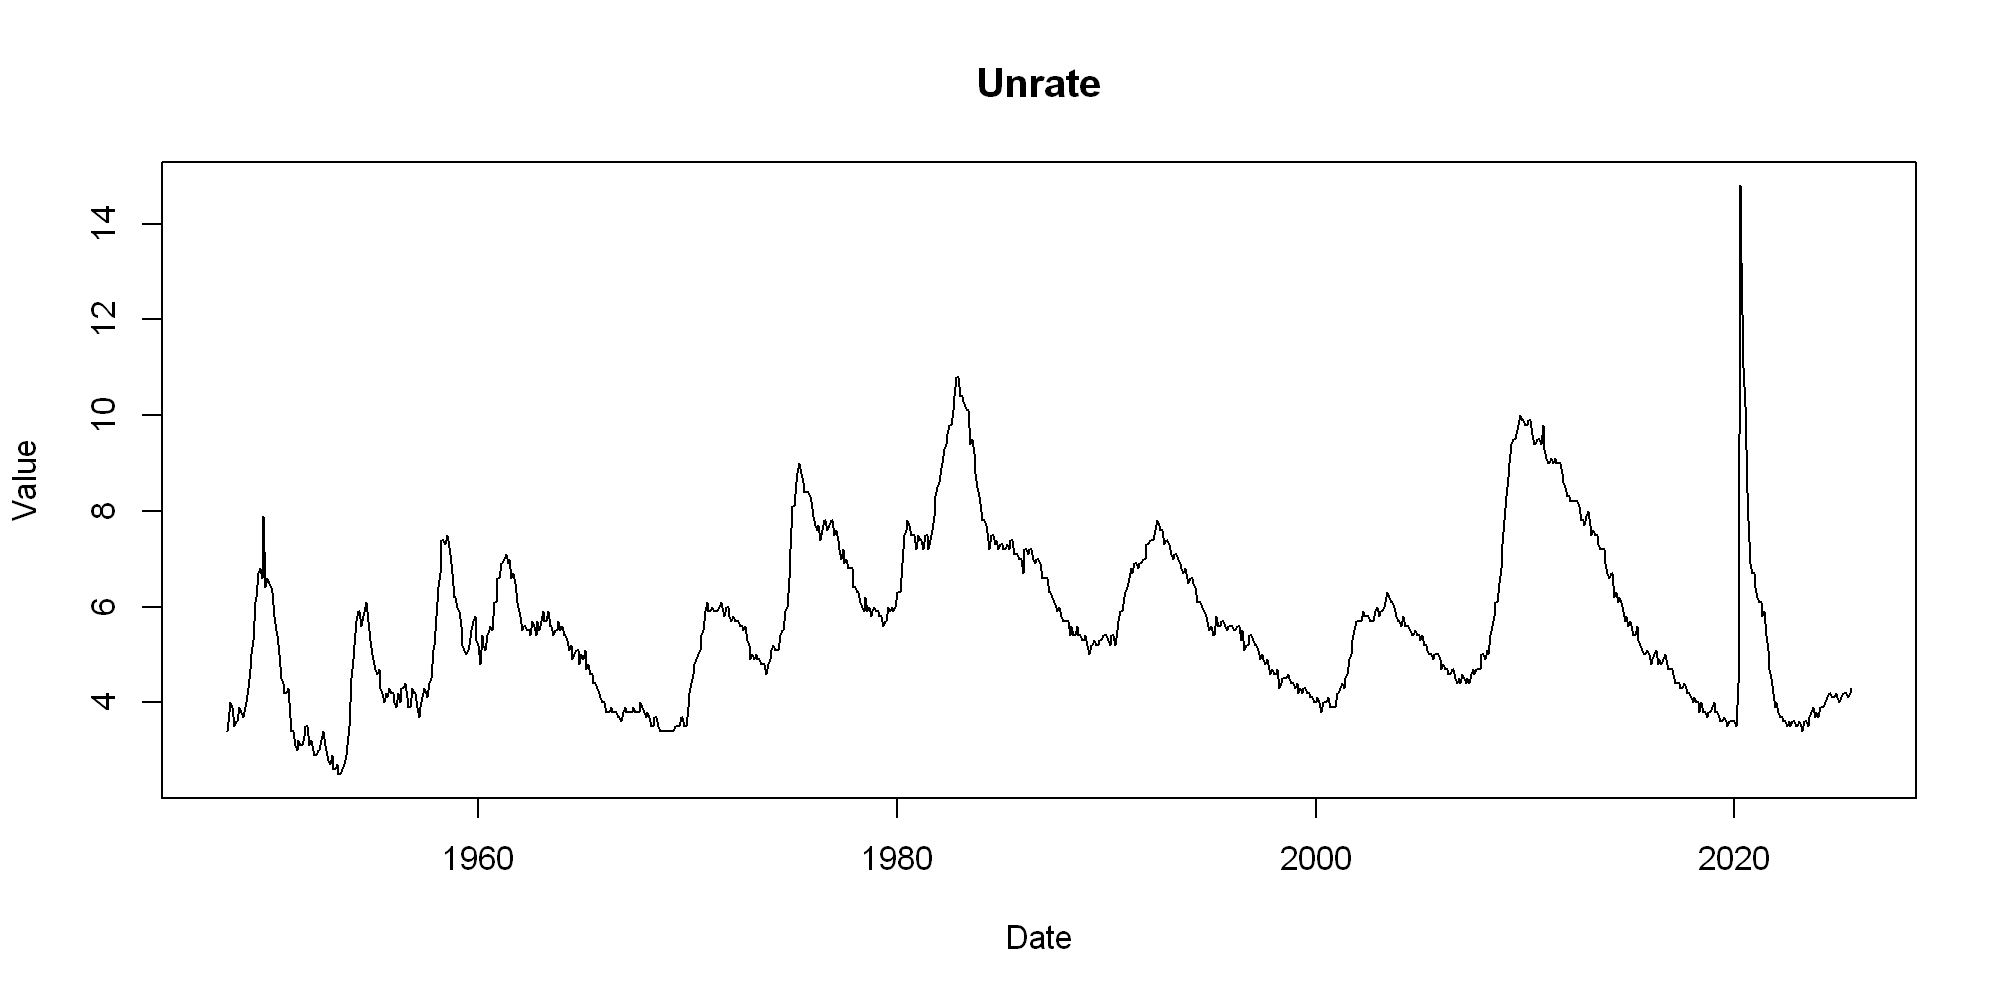

In [8]:
par(bg = 'white')
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 200)
plot(data[,.(date, value)], type = "l", main = "Unrate", xlab = "Date", ylab = "Value")

In [9]:
unrate_ts <- ts(data$value, 
                start = c(as.numeric(format(min(data$date), "%Y")),
                          as.numeric(format(min(data$date), "%m"))),
                frequency = 12)

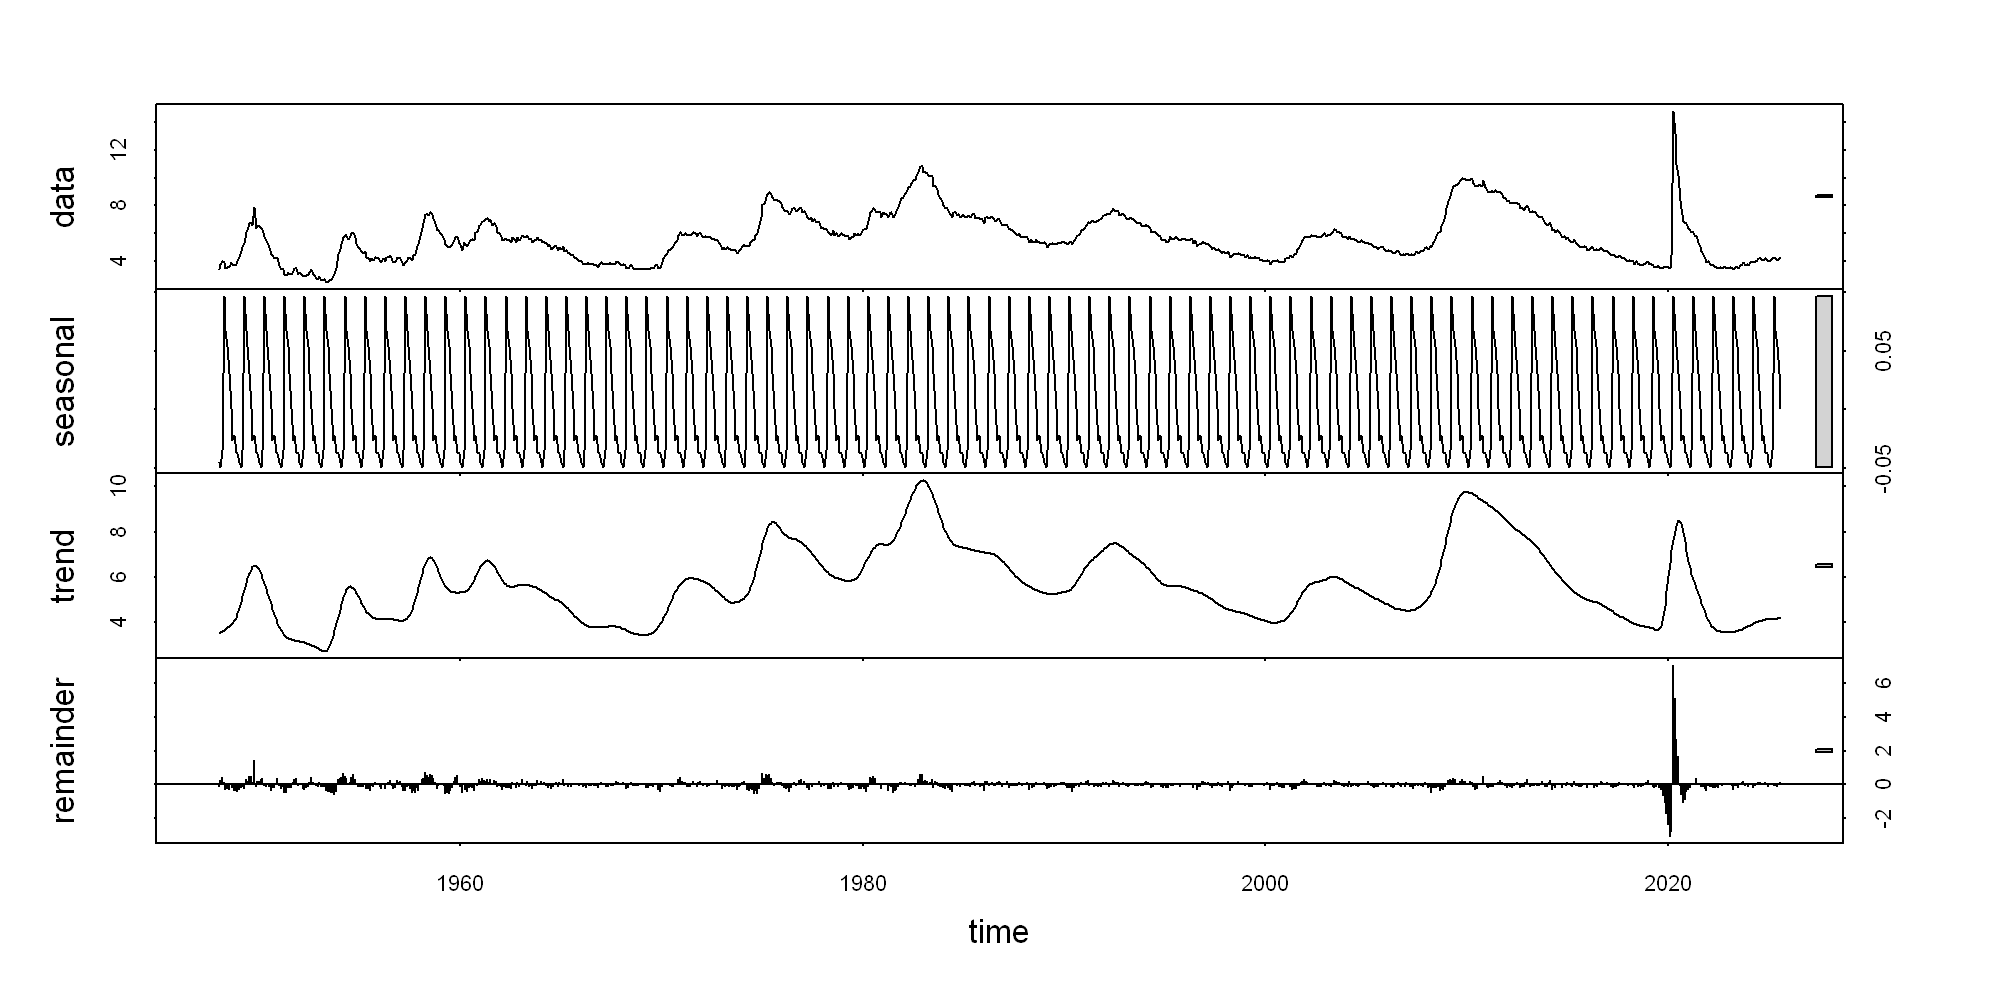

In [10]:
par(bg = 'white')
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 200)
plot(stl(x = unrate_ts, s.window = "periodic"))

Verificando se é estacionario ou não

Não é estacionaria

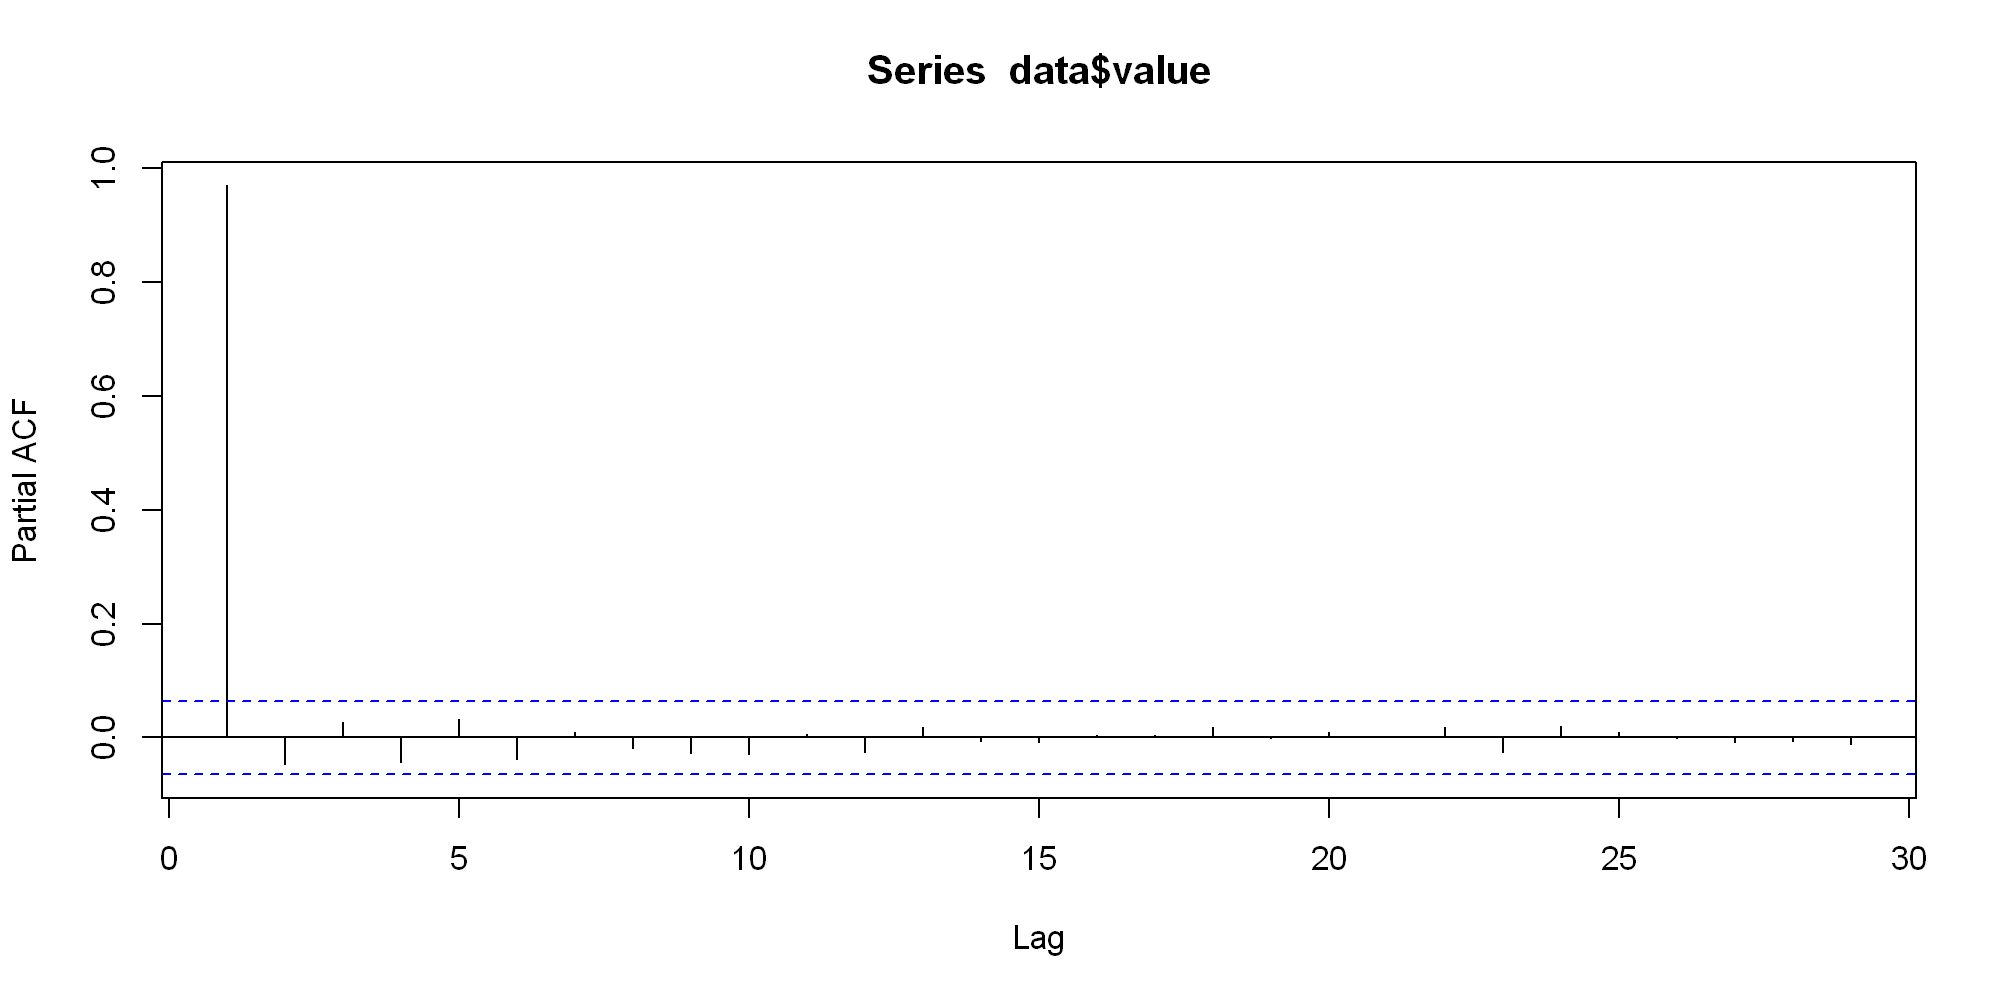

In [13]:
par(bg = 'white')
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 200)
pacf(data$value)

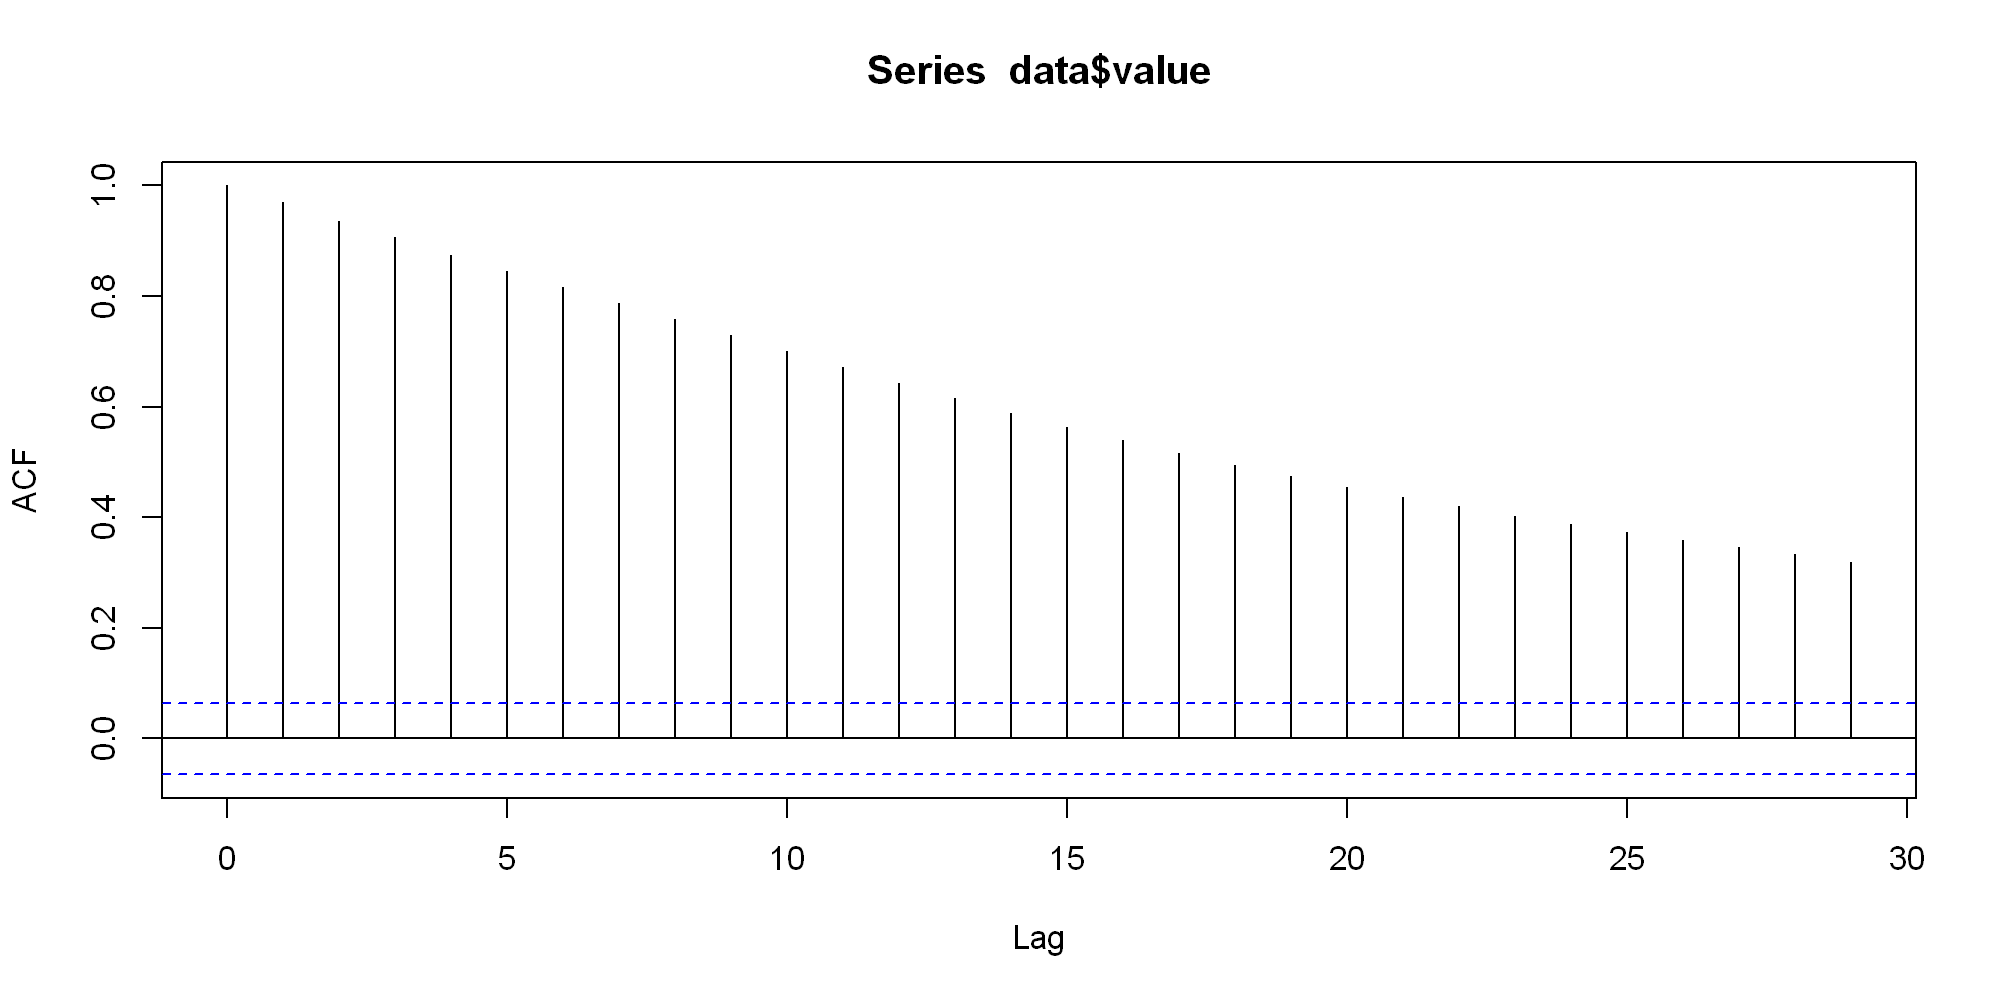

In [14]:
par(bg = 'white')
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 200)
acf(data$value)

In [15]:
auto.arima(data$value)

Series: data$value 
ARIMA(1,1,1) 

Coefficients:
          ar1     ma1
      -0.7733  0.8285
s.e.   0.1044  0.0915

sigma^2 = 0.1711:  log likelihood = -498.29
AIC=1002.58   AICc=1002.6   BIC=1017.09

In [16]:
model = auto.arima(data$value)
model

Series: data$value 
ARIMA(1,1,1) 

Coefficients:
          ar1     ma1
      -0.7733  0.8285
s.e.   0.1044  0.0915

sigma^2 = 0.1711:  log likelihood = -498.29
AIC=1002.58   AICc=1002.6   BIC=1017.09

In [17]:
Box.test(model$residuals, type = "Ljung-Box",fitdf = 2, lag=10)


	Box-Ljung test

data:  model$residuals
X-squared = 1.8937, df = 8, p-value = 0.9841



* Se **p-valor > 0.05** → não rejeitamos $H_0$ → resíduos parecem ruído branco (modelo adequado).
* Se **p-valor ≤ 0.05** → rejeitamos $H_0$ → resíduos ainda têm autocorrelação (modelo inadequado).



In [18]:
predict = forecast(model, h = 12)

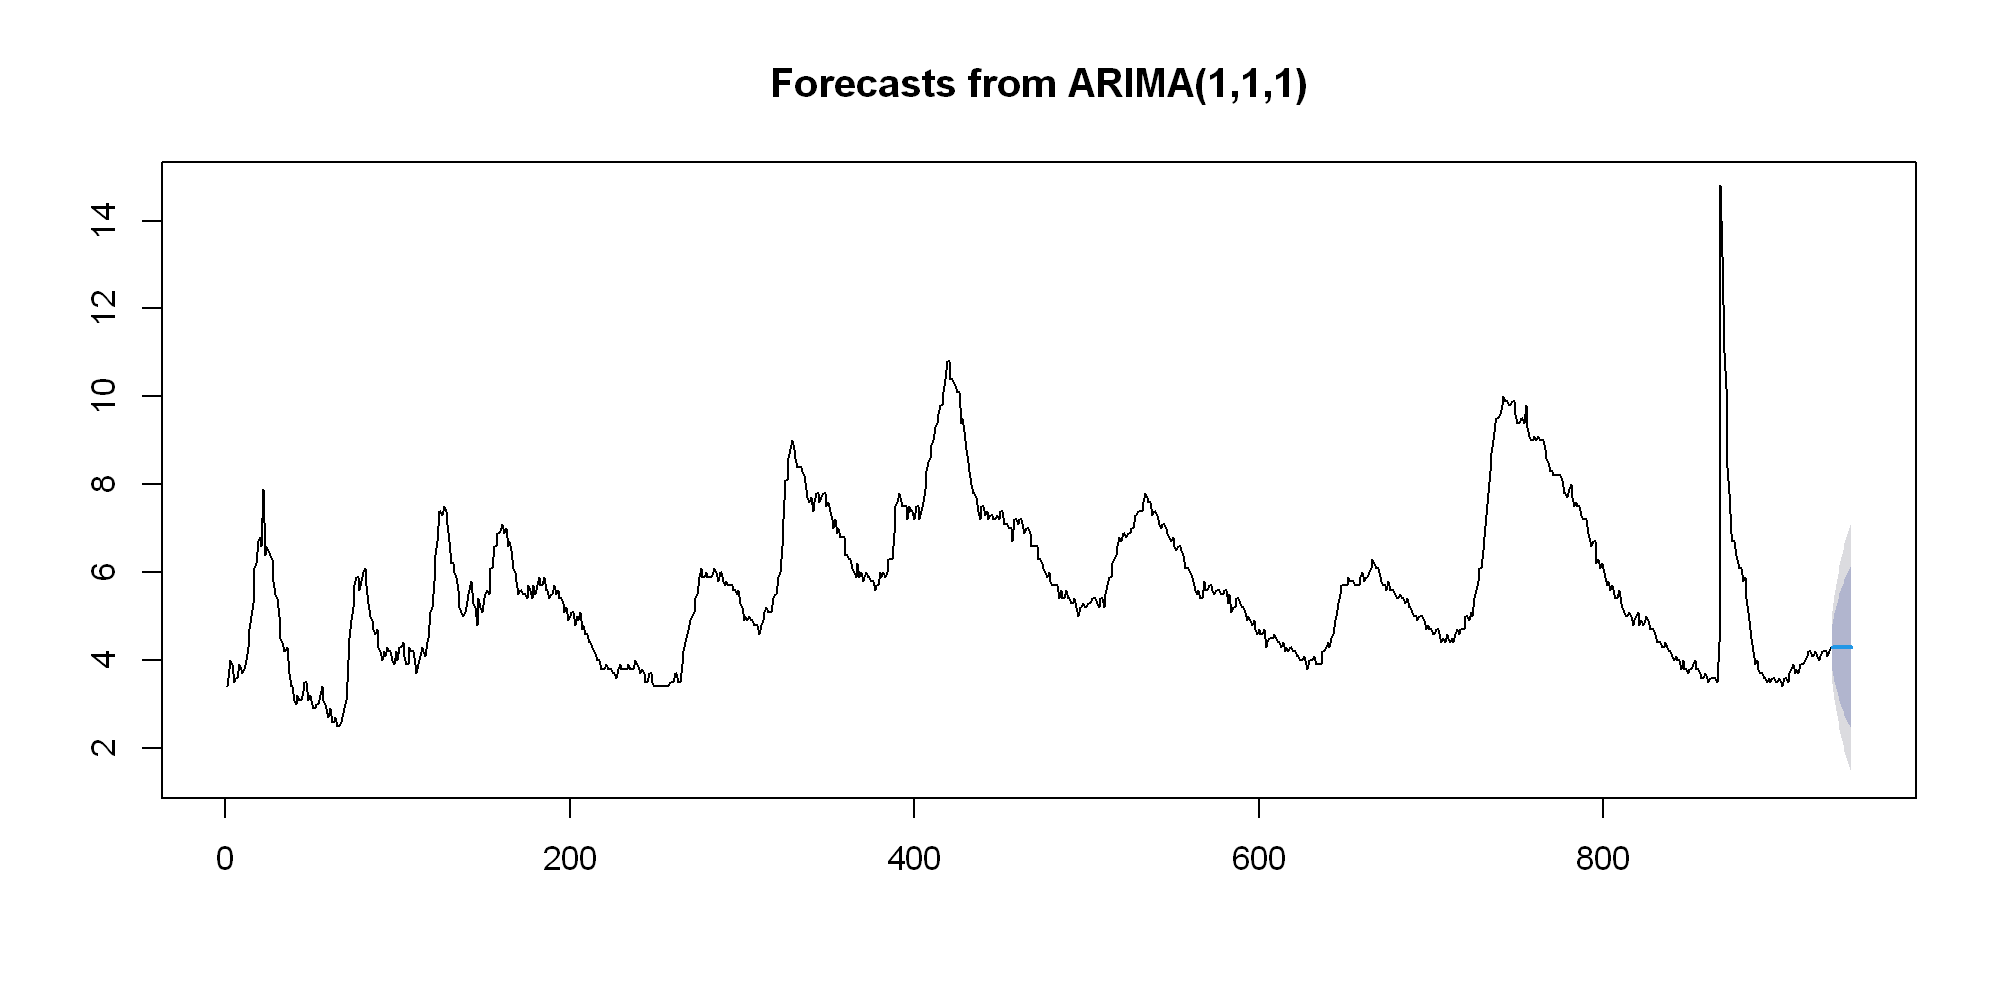

In [19]:
par(bg = 'white')
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 200)
plot(predict)